In [2]:
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
import geopandas as gpd
import csv
import math

In [3]:
# Data frame for the nyc avergaes
df = pd.read_csv('../data/zipcode_averages_nyc.csv')

# File path for the shape file
fp = '../data/shape-files/zipcode_shapes.shp'
map_df = gpd.read_file(fp)

In [4]:
# dataframe of all averages from 2005
df_2005 = df.loc[ (df['year'] == '2005') ].T
# Getting rid of the first two rows
df_2005 = df_2005.iloc[2:]
# Renaming columns
df_2005.columns = ["BROOKLYN", "BRONX", "QUEENS", "MANHATTAN","STATEN ISLAND"]
# Adding the zipcodes as a column entry (before it was just the name of the index)
df_2005['ZIPCODES'] = list(df_2005.index)


# Combining columns into one value (Each column only has one valid average since a zipcode can only be )
boroughs = ["BROOKLYN", "BRONX", "QUEENS", "MANHATTAN", "STATEN ISLAND"]
averages = []
for index, row in df_2005.iterrows():
    temp = 0
    for bor in boroughs:
        if (not(math.isnan(row[bor]))):
            temp = row[bor]
    averages.append(temp)
df_2005['AVERAGES'] = averages


# Getting new array of averages so that the zipcodes have a one to one mapping
list_of_zipcodes_old = list(df_2005.index)
list_of_zipcodes_new = list(map_df['ZIPCODE'])
new_averages = []

for zip in list_of_zipcodes_new:
    if zip in list_of_zipcodes_old:
        index = list_of_zipcodes_old.index(zip)
        new_averages.append(averages[index])
    else:
        new_averages.append(0)
        
        
# Dropping columns that are not needed (the boroughs)
df_2005 = df_2005.drop(boroughs, axis=1)

# Final dataframe from 2005
# df_2005

map_df['AVERAGES'] = new_averages

print(new_averages.count(0))


map_df

88


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,AVERAGES
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",369183.03
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",714624.15
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",479936.12
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",691082.46
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",504385.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",384136.16
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",394991.47
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",0.00
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",0.00


In [5]:
# Custom colormap for the graph in the next cell

a = cm.get_cmap('cool', 32)
b = cm.get_cmap('spring', 32)
c = cm.get_cmap('autumn_r', 64)
d = cm.get_cmap('bwr_r', 192)
e = cm.get_cmap('Greens', 192)

newcolors = np.vstack((a(np.linspace(0, 1, 32)), 
                       b(np.linspace(0, 1, 32)), 
                       c(np.linspace(0, 1, 64)),
                       d(np.linspace(0, 0.5, 192)),
                       e(np.linspace(0, 1, 192)),
                      ))


newcmp = ListedColormap(newcolors, name='zips')

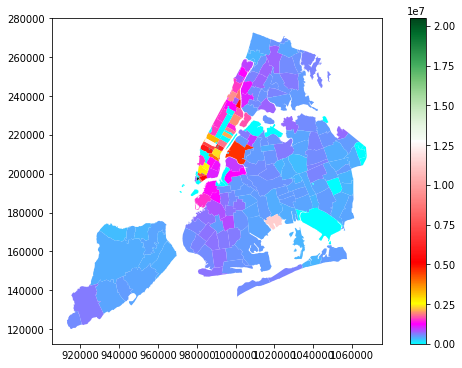

In [9]:
# Map of NYC

# map_df.plot(column="AVERAGES", legend=True)
fig, ax = plt.subplots(1, figsize=(10, 6))
map_df.plot(column="AVERAGES", cmap=newcmp, linewidth=0.8, ax=ax, legend=True)